We first begin by considering simple strategies to generate random samples from a given distribution. We assume that we have in hand an algorithm to generate pseudo-random uniform samples in the range $(0, 1)$

Suppose that $z$ is uniformly distributed in the interval $(0,1)$ and that we transform the values $z$ using some function $f$ so that $y=f(z)$. The distribution of $y$ will be governed by

$$p(y)=p(z)\left|\frac{dz}{dy}\right|$$

where, in this case $p(z)=1$. Our goal is to find a some function $f$ so that the values $y$ follow a given distribution $p(z)$. Integrating last equation

$$z = h(y)\equiv\int_{-\infty}^y p(\hat y )d\hat y$$

which is the indefinite integral of $p(y)$. Thus $y=h^{-1}(z)$ and so the function $f$ we are looking for is the inverse of the inddefinite integral of the desired distribution.

For example, consider the exponential distribution with pdf $p(y)=\lambda exp(-\lambda y)$ where $0 \leq y < \infty$. Integrating the pdf we get

$$h(y)=\int_0^y \lambda exp(-\lambda y)=1 - exp(-\lambda y )$$

and so, to transform a uniformly distributed value $z$ we use $f(z)=h^{-1}=-\frac{ln(1-z)}{\lambda}$

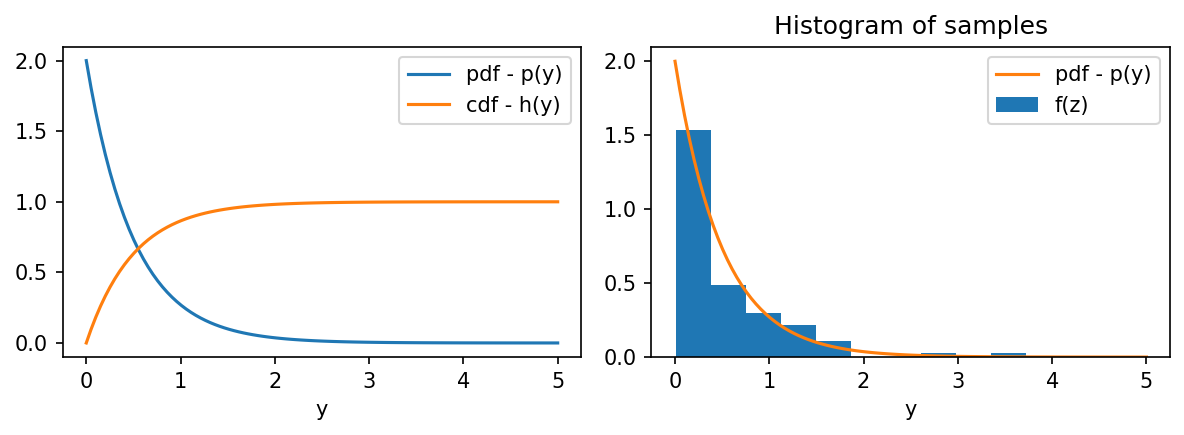

In [19]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

lambd = 2
exp_pdf = lambda x: lambd * np.exp(-1 * lambd * x)
exp_cdf = lambda x: 1 - np.exp(-1 * lambd * x)
exp_inverse_cdf = lambda x: -1*(np.log(1 - x))/lambd


fig, axs = plt.subplots(1, 2, dpi=150, figsize=(8, 3))

y = np.linspace(0, 5, 100)
axs[0].plot(y, exp_pdf(y), label="pdf - p(y)")
axs[0].plot(y, exp_cdf(y), label="cdf - h(y)")
axs[0].set_xlabel("y")
axs[0].legend()

# We draw 100 samples from a uniform distribution in the (0, 1) interval
z = np.random.rand(100)
# Plot histogram of the transformed uniform samples
axs[1].hist(exp_inverse_cdf(z), label="f(z)", density=True)
axs[1].plot(y, exp_pdf(y), label="pdf - p(y)")

axs[1].set_title("Histogram of samples")
axs[1].set_xlabel("y")
axs[1].legend()

plt.tight_layout()
plt.show()

### Box-Muller method
We finish by considering the Box-Muller method for generating samples from a Gaussian distribution. Let's assume we have two uniform samples $s, t\in(0,1)$. Now consider the bivariate normal distribution centered in the origin in polar coordinates and integrate it to get the CDF.

$$h(R) = \int_0^R\int_0^{2\pi}\frac{1}{2\pi}e^{\frac{r^2}{2}}d\theta r dr$$
$$=\frac{1}{2\pi}\int_0^{2\pi}d\theta \int_0^R e^{\frac{r^2}{2}} r dr = \int_0^{R^2/2}e^{-u}du=1-e^{R^2/2}$$

If we set $h(R)=p$ where $p\in(0,1)$ then $R=\sqrt{-2log(1-p)}$ and since $R$ is a radius we can proyect it to get $(x,y)$ coordinates as 

$$x = \sqrt{-2log(s)}cos(2\pi t)$$
$$y = \sqrt{-2log(s)}sin(2\pi t)$$

where we are parametrizing the angle with $t$ and $s = 1 - p$. We now have two random samples of standard normal distribution, if we instead need samples from a gaussian with mean and std $(\mu, \sigma)$ we can simply use $\mu + z\sigma$ where $z$ comes from a standard normal, with that the samples generated with two uniform values is

$$x = \mu + \sigma\sqrt{-2log(s)}cos(2\pi t)$$
$$y = \mu + \sigma\sqrt{-2log(s)}sin(2\pi t)$$

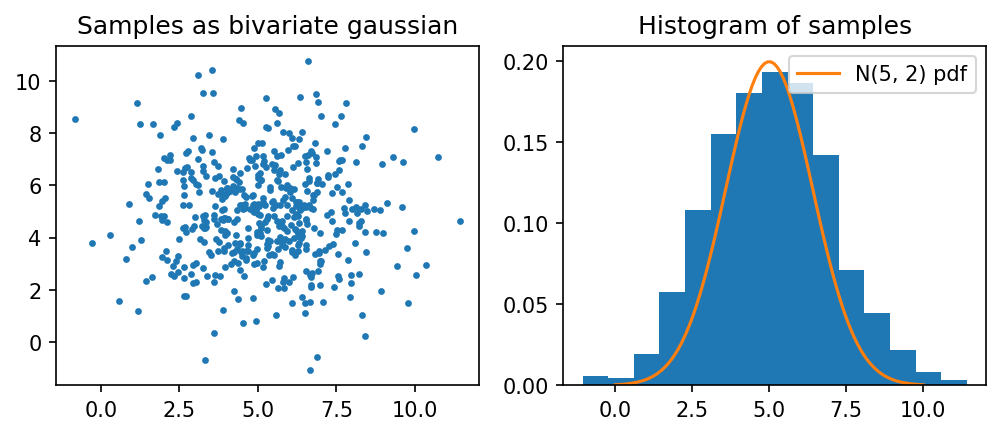

In [33]:
# Let's generate 1000 normal samples with mean and std (5, 2)
mean = 5
std = 2

s = np.random.rand(500)
t = np.random.rand(500)

x = mean + std*np.sqrt(-2*np.log(s))*np.cos(2*np.pi*t)
y = mean + std*np.sqrt(-2*np.log(s))*np.sin(2*np.pi*t)

fig, axs = plt.subplots(1, 2, dpi=150, figsize=(8, 3))
axs[0].scatter(x, y, s=5)
axs[0].set_title("Samples as bivariate gaussian")


normal_pdf = lambda x: 1/(std * np.sqrt(2 * np.pi))*np.exp(-1*(x-mean)**2/(2*std))
t = np.linspace(0, 10, 100)
axs[1].hist(np.concatenate([x, y]), density=True, bins=15)
axs[1].plot(t, normal_pdf(t), label=f"N({mean}, {std}) pdf")
axs[1].set_title("Histogram of samples")
axs[1].legend()
plt.show()

This transformation technique depends on the ability to calculate the indefinite integral of a distribution and then invert it. Such operations will only be feasible for a limited amount of distributions, and so we have to explore other options